<a href="https://colab.research.google.com/github/Sudheendra-RD/CNN/blob/main/CNNInceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
image_size = [224,224]

train_path = '/content/drive/MyDrive/Colab Notebooks/CNN/Walk_or_Run/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/CNN/Walk_or_Run/test'

In [3]:
inception = InceptionV3(input_shape=image_size + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [4]:
for layer in inception.layers:
  layer.trainable = False

In [5]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/CNN/Walk_or_Run/train/*')
len(folders)

2

In [6]:
flatten = Flatten()(inception.output)

In [7]:
output_layer = Dense(len(folders), activation='sigmoid')(flatten)

model = Model(inputs = inception.input, outputs = output_layer)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [9]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/Walk_or_Run/train',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 600 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/Walk_or_Run/test',
                                            target_size = (224,224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 141 images belonging to 2 classes.


In [13]:
fit = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 10,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
38/38 [==============================] - 140s 3s/step - loss: 1.9217 - accuracy: 0.7150 - val_loss: 1.4628 - val_accuracy: 0.7518
Epoch 2/10
38/38 [==============================] - 12s 316ms/step - loss: 0.7094 - accuracy: 0.8500 - val_loss: 0.8746 - val_accuracy: 0.7589
Epoch 3/10
38/38 [==============================] - 12s 312ms/step - loss: 0.4202 - accuracy: 0.8833 - val_loss: 0.8405 - val_accuracy: 0.8156
Epoch 4/10
38/38 [==============================] - 12s 314ms/step - loss: 0.3094 - accuracy: 0.9250 - val_loss: 0.7941 - val_accuracy: 0.8085
Epoch 5/10
38/38 [==============================] - 12s 312ms/step - loss: 0.2608 - accuracy: 0.9300 - val_loss: 0.9374 - val_accuracy: 0.8156
Epoch 6/10
38/38 [==============================] - 12s 313ms/step - loss: 0.2755 - accuracy: 0.9283 - val_loss: 0.9533 - val_accuracy: 0.7943
Epoch 7/10
38/38 [==============================] - 12s 314ms/step - loss: 0.2767 - accuracy: 0.9317 - val_loss: 0.8167 - val_accuracy: 0.8227
E

In [14]:
import matplotlib.pyplot as plt

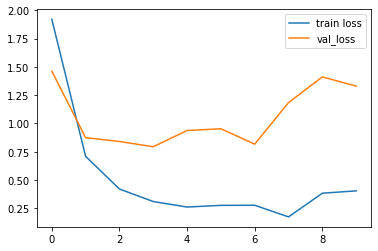

In [16]:
plt.plot(fit.history['loss'], label = 'train loss')
plt.plot(fit.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

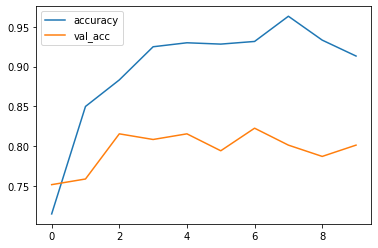

In [17]:
plt.plot(fit.history['accuracy'], label = 'accuracy')
plt.plot(fit.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

In [18]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Colab Notebooks/CNN/Walk_or_Run/inceptionv3.h5')

In [19]:
y_pred = model.predict(test_set)

In [21]:
np.argmax(y_pred, axis=1)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0])